# **DataCamp.Course_041_Introduction to Statistics in Python**

### **Course Description**

Course Description

Statistics is the study of how to collect, analyze, and draw conclusions from data. It’s a hugely valuable tool that you can use to bring the future into focus and infer the answer to tons of questions. For example, what is the likelihood of someone purchasing your product, how many calls will your support team receive, and how many jeans sizes should you manufacture to fit 95% of the population? In this course, you'll discover how to answer questions like these as you grow your statistical skills and learn how to calculate averages, use scatterplots to show the relationship between numeric values, and calculate correlation. You'll also tackle probability, the backbone of statistical reasoning, and learn how to use Python to conduct a well-designed study to draw your own conclusions from data.

## **Summary Statistics (Module 01-041)**

#### **What is statistics?**

*The field of statistics* - the practice and study of collecting and analyzing data
*A summary statistic* - a fact about or summary of some data

*What can statistics do?*

- How likely is someone to purchase a product? Are people more likely to purchase it if they can use a di(erent payment system?
- How many occupants will your hotel have? How can you optimize occupancy?
- How many sizes of jeans need to be manufactured so they can ,t 95% of the population?
- Should the same number of each size be produced?
- A/B tests: Which ad is more e(ective in getting people to purchase a product?

*Types of statistics*

1. Descriptive statistics: Describe and summarize data
2. Inferential statistics: Use a sample of data to make inferences about a larger population

*Types of data*

1. Numeric (Quantitative)
1.1. Continuous (Measured)
1.2. Discrete (Counted)
2. Categorical (Qualitative)
2.1. Nominal (Unordered)
2.2. Ordinal (Ordered)

#### **Measures of center**

1. Mean 
`import numpy as np`
`np.mean(msleep['sleep_total'])`

2. Median
`np.median(msleep['sleep_total'])`

3. Mode
`import statistics`
`statistics.mode(msleep['vore'])`

Adding an outlier

`msleep[msleep['vore'] == 'insecti']`
`msleep[msleep['vore'] == "insecti"]['sleep_total'].agg([np.mean, np.median])`

**Mean and median**

In this chapter, you'll be working with the [2018 Food Carbon Footprint Index from nu3](https://www.nu3.de/blogs/nutrition/food-carbon-footprint-index-2018). The `food_consumption` dataset contains information about the kilograms of food consumed per person per year in each country in each food category (`consumption`) as well as information about the carbon footprint of that food category (`co2_emissions`) measured in kilograms of carbon dioxide, or CO2, per person per year in each country.

In this exercise, you'll compute measures of center to compare food consumption in the US and Belgium using your `pandas` and `numpy` skills.

`pandas` is imported as `pd` for you and `food_consumption` is pre-loaded.

STEP 01
    Import numpy with the alias np.
    Create two DataFrames: one that holds the rows of food_consumption for 'Belgium' and another that holds rows for 'USA'. Call these be_consumption and usa_consumption.
    Calculate the mean and median of kilograms of food consumed per person per year for both countries.

In [186]:
# Import pandas with alias pd
import pandas as pd

#Load Data
food_consumption = pd.read_csv('datasets/food_consumption.csv')

# Import numpy with alias np
import numpy as np

# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


STEP 02
    Subset food_consumption for rows with data about Belgium and the USA.
    Group the subsetted data by country and select only the consumption column.
    Calculate the mean and median of the kilograms of food consumed per person per year in each country using .agg().

In [187]:
# Import numpy as np
import numpy as np

# Subset for Belgium and USA only
be_and_usa_list = ['Belgium','USA']
be_and_usa = food_consumption[food_consumption['country'].isin(be_and_usa_list)]
#df[df['Country Name'].isin(country_list)]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


**Mean vs. median**

In the video, you learned that the mean is the sum of all the data points divided by the total number of data points, and the median is the middle value of the dataset where 50% of the data is less than the median, and 50% of the data is greater than the median. In this exercise, you'll compare these two measures of center.

`pandas` is loaded as `pd`, `numpy` is loaded as `np`, and `food_consumption` is available.

STEP 01
    Import matplotlib.pyplot with the alias plt.
    Subset food_consumption to get the rows where food_category is 'rice'.
    Create a histogram of co2_emission for rice and show the plot.

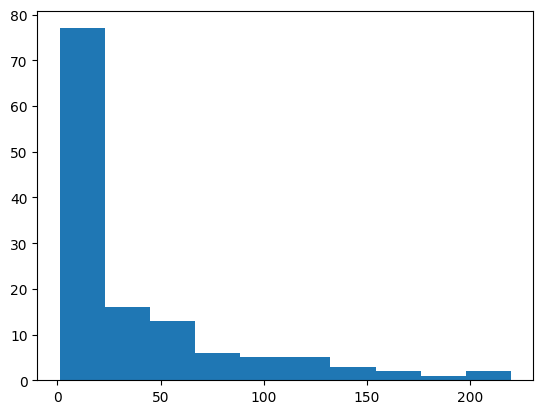

In [188]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

STEP02
Question

Take a look at the histogram you just created of different countries' CO2 emissions for rice. Which of the following terms best describes the shape of the data?

*Possible Answer: Right-skewed*

STEP03
Use .agg() to calculate the mean and median of co2_emission for rice.

In [189]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


Question

Given the skew of this data, what measure of central tendency best summarizes the kilograms of CO2 emissions per person per year for rice?

*Possible Answer: median*

#### **Measures of spread**

1. Variance: Average distance from each data point to the data's mean. Use np.var()

`np.var(msleep['sleep_total'], ddof=1)`

Without ddof=1 , population variance is
calculated instead of sample variance:

`np.var(msleep['sleep_total'])`

2. Standard deviation

`np.std(msleep['sleep_total'], ddof=1)`

3. Mean absolute deviation

`dists = msleep['sleep_total'] - mean(msleep$sleep_total)`
`np.mean(np.abs(dists))`

Standard deviation vs. mean absolute deviation
Standard deviation squares distances, penalizing longer distances more than shorter ones.
Mean absolute deviation penalizes each distance equally.
One isn't better than the other, but SD is more common than MAD.

4. Quantiles

0.5 quantile = median
`np.quantile(msleep['sleep_total'], 0.5)`

Quartiles: 
`np.quantile(msleep['sleep_total'], [0, 0.25, 0.5, 0.75, 1])`

5. Boxplots use quartiles

`import matplotlib.pyplot as plt`
`plt.boxplot(msleep['sleep_total'])`
`plt.show()`

6. Quantiles using np.linspace()

`np.quantile(msleep['sleep_total'], [0, 0.2, 0.4, 0.6, 0.8, 1])`
array([ 1.9 , 6.24, 9.48, 11.14, 14.4 , 19.9 ])

`np.linspace(start, stop, num)`

`np.quantile(msleep['sleep_total'], np.linspace(0, 1, 5))`
array([ 1.9 , 7.85, 10.1 , 13.75, 19.9 ])

7. Interquartile range (IQR): Height of the box in a boxplot

`np.quantile(msleep['sleep_total'], 0.75) - np.quantile(msleep['sleep_total'], 0.25)`

`from scipy.stats import iqr`
`iqr(msleep['sleep_total'])`

8. Outliers: data point that is substantially different from the others

How do we know what a substantial di(erence is? A data point is an outlier if:

data < Q1 − 1.5 × IQR or
data > Q3 + 1.5 × IQR

Finding outliers:

`from scipy.stats import iqr`
`iqr = iqr(msleep['bodywt'])`
`lower_threshold = np.quantile(msleep['bodywt'], 0.25) - 1.5 * iqr`
`upper_threshold = np.quantile(msleep['bodywt'], 0.75) + 1.5 * iqr`
`msleep[(msleep['bodywt'] < lower_threshold) | (msleep['bodywt'] > upper_threshold)]`

9. **All in one go**

`msleep['bodywt'].describe()`


**Quartiles, quantiles, and quintiles**

Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

In this exercise, you'll calculate quartiles, quintiles, and deciles, which split up a dataset into 4, 5, and 10 pieces, respectively.

Both `pandas` as `pd` and `numpy` as `np` are loaded and `food_consumption` is available.

STEP01

Calculate the quartiles of the co2_emission column of food_consumption

In [190]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


STEP 02

Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food_consumption.

In [191]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


STEP 03

Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles).

In [192]:
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


**Variance and standard deviation**

Variance and standard deviation are two of the most common ways to measure the spread of a variable, and you'll practice calculating these in this exercise. Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.

Both `pandas` as `pd` and `numpy` as `np` are loaded, and `food_consumption` is available.

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


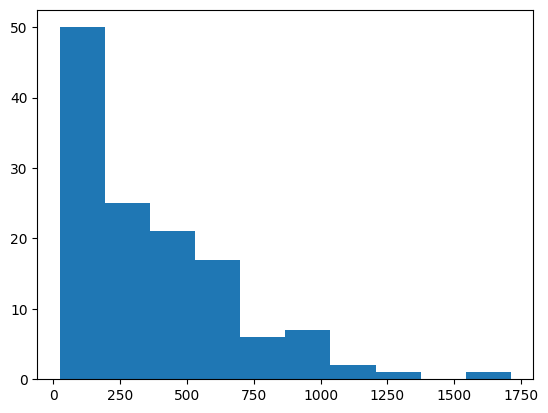

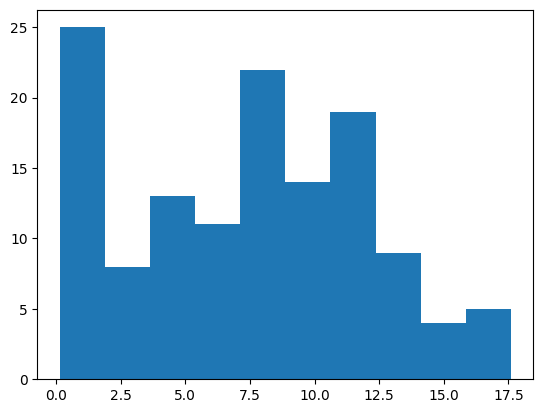

In [193]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'])
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'])
# Show plot
plt.show()

**Finding outliers using IQR**

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. 
If a value is less than **Q1 -1.5 x IQR** or greater than **Q3 +1.5 x IQR**, it's considered an outlier. In fact, this is how the lengths of the whiskers in a matplotlib box plot are calculated.

![Diagram of a box plot showing median, quartiles, and outliers](/'datasets/iqr.png')

In this exercise, you'll calculate IQR and use it to find some outliers. `pandas` as `pd` and `numpy` as `np` are loaded and `food_consumption` is available.

STEP 01
Calculate the total co2_emission per country by grouping by country and taking the sum of co2_emission. Store the resulting DataFrame as emissions_by_country.

STEP 02
Compute the first and third quartiles of emissions_by_country and store these as q1 and q3.
Calculate the interquartile range of emissions_by_country and store it as iqr.

STEP 03
Calculate the lower and upper cutoffs for outliers of emissions_by_country, and store these as lower and upper.

STEP 04
Subset emissions_by_country to get countries with a total emission greater than the upper cutoff or a total emission less than the lower cutoff.

In [194]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [195]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

In [196]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [197]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


## **Random Numbers and Probability (Module 02-041)**

#### **What are the chances?**

Measuring chance
What's the probability of an event?

P (event) = # ways event can happen / total # of possible outcomes

Example: a coin flip
P (heads) = 1 way to get heads / 2 possible outcomes = 1 / 2 = 0.5 = 50% chance of getting heads

Example: a coin 

Example 2: sales people

Sales = [Amir, Brian, Claire, Damian]

P(Brian) = 1 / 4 = 25% change of selecting Brian

1. Sampling from a DataFrame

`print(sales_counts)`

`sales_counts.sample()`

2. Setting a random seed

`np.random.seed(10)`

`sales_counts.sample()`

3. Sampling without replacement

A second meeting happen when Brian was bussy

Sales = [Amir, Claire, Damian]

P(Claire) = 1 / 3 = 33% change of selecting Claire

Sampling twice in Python

`sales_counts.sample(2)`

4. Sampling with replacement

A second meeting happen when Brian was available

Sales = [Amir, Brian, Claire, Damian]

P(Claire) = 1 / 4 = 25% change of selecting Claire

Sampling with/without replacement in Python

`sales_counts.sample(5, replace = True)`

5. Independent events

Two events are independent if the probability of the second event isn't a(ected by the outcome of the first event.

Sampling with replacement = each pick is independent

6. Dependent events

Two events are dependent if the probability of the second event is a(ected by the outcome of the first event.

Sampling without replacement = each pick is dependent


**Calculating probabilities**

You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by

P (event) = # ways event can happen / total # of possible outcomes

Both `pandas` as `pd` and `numpy` as `np` are loaded and `amir_deals` is available.

STEP 01
Count the number of deals Amir worked on for each product type and store in counts.

STEP 02
Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as probs.


In [240]:
#Load Data
amir_deals = pd.read_csv('datasets/amir_deals.csv')

# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / counts.sum()
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


**Sampling deals**

In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

Both `pandas` as `pd` and `numpy` as `np` are loaded and `amir_deals` is available.

STEP01
Set the random seed to 24.
Take a sample of 5 deals without replacement and store them as sample_without_replacement.


In [199]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


STEP 02
Take a sample of 5 deals with replacement and save as sample_with_replacement.

In [200]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace = True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


#### **Discrete distributions**

Probability distribution: Describes the probability of each possible outcome in a scenario
Expected value: mean of a probability distribution

Discrete probability distributions: Describe probabilities for discrete outcomes

1. Sampling from discrete distributions

print(die)

np.mean(die['number'])

rolls_10 = die.sample(10, replace = True)

rolls_10

2. Visualizing a sample

rolls_10['number'].hist(bins=np.linspace(1,7,7))
plt.show()

4. Sample distribution vs. theoretical distribution

TEORICAL
mean(die['number']) = 3.5

SAMPLE
np.mean(rolls_10['number']) = 3.0
np.mean(rolls_100['number']) = 3.4
np.mean(rolls_1000['number']) = 3.48

5. Law of large numbers
As the size of your sample increases, the sample mean will approach the expected value.

**Creating a probability distribution**

A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the `restaurant_groups` DataFrame.

Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum. The `restaurant_groups` data is available. `pandas` is loaded as `pd`, `numpy` is loaded as `np`, and `matplotlib.pyplot` is loaded as `plt`.

STEP 01

Create a histogram of the `group_size` column of `restaurant_groups`, setting `bins` to `[2, 3, 4, 5, 6]`. Remember to show the plot.

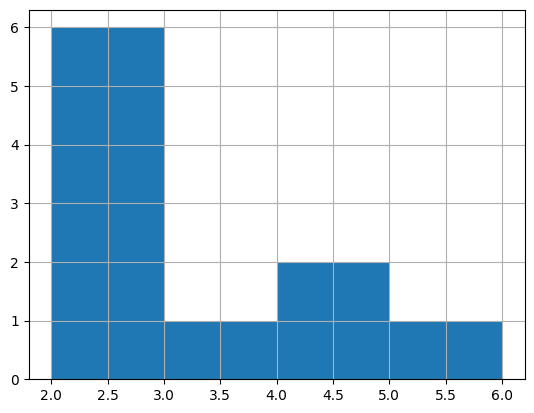

In [201]:
restaurantg = {'group_size' : [2,2,2,2,2,2,3,4,4,5], 'col2':[1,2,3,4,5,6,7,8,9,10]}
restaurant_groups = pd.DataFrame(data=restaurantg)

# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2, 3, 4, 5, 6])
plt.show()

STEP 02

Count the number of each group_size in restaurant_groups, then divide by the number of rows in restaurant_groups to calculate the probability of randomly selecting a group of each size. Save as size_dist.
Reset the index of size_dist.
Rename the columns of size_dist to group_size and prob.

In [202]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

   group_size  prob
0           2   0.6
1           4   0.2
2           3   0.1
3           5   0.1


STEP 03
Calculate the expected value of the size_distribution, which represents the expected group size, by multiplying the group_size by the prob and taking the sum.

In [203]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Calculate expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print(expected_value)

2.8


STEP 04
Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.

In [204]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(prob_4_or_more)

0.30000000000000004


#### **Continuous distributions**

1. Waiting for the bus

2. Uniform distribution in Python
P (wait time ≤ 7)

from scipy.stats import uniform
uniform.cdf(7, 0, 12)

`0.5833333`

3. "Greater than" probabilities
P (wait time ≥ 7) = 1 − P (wait time ≤ 7)

from scipy.stats import uniform
1 - uniform.cdf(7, 0, 12)

`0.4166667`

4. in between
P (4 ≤ wait time ≤ 7)

from scipy.stats import uniform 
uniform.cdf(7,0,12) - uniform.cdf(4,0,12)

`0.25`

5. Total area = 1
P (0 ≤ wait time ≤ 12) = ?
P(0 ≤ outcome ≤ 12) = 12 × 1 / 12 = 1

6. Generating random numbers according to uniform distribution

from scipy.stats import uniform
uniform.rvs(0, 5, size=10)

`array([1.89740094, 4.70673196, 0.33224683, 1.0137103 , 2.31641255, 3.49969897, 0.29688598, 0.92057234, 4.71086658, 1.56815855])`

7. Other continuous distributions: Normal distribution, Exponential distribution

**Data back-ups**

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

STEP 01
To model how long Amir will wait for a back-up using a continuous uniform distribution, save his lowest possible wait time as min_time and his longest possible wait time as max_time. Remember that back-ups happen every 30 minutes.

STEP 02
Import uniform from scipy.stats and calculate the probability that Amir has to wait less than 5 minutes, and store in a variable called prob_less_than_5

STEP 03
Calculate the probability that Amir has to wait more than 5 minutes, and store in a variable called prob_greater_than_5.

STEP 04

In [205]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, 0, 30)
print(prob_less_than_5)

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, 0, 30)
print(prob_greater_than_5)

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, 0, 30) - uniform.cdf(10, 0, 30)
print(prob_between_10_and_20)

0.16666666666666666
0.8333333333333334
0.3333333333333333


**Simulating wait times**

To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

As usual, `pandas` as `pd`, `numpy` as `np`, and `matplotlib.pyplot` as `plt` are loaded.

step 01
Set the random seed to 334.

step02
Import uniform from scipy.stats.

step03
Generate 1000 wait times from the continuous uniform distribution that models Amir's wait time. Save this as wait_times.

step04
Create a histogram of the simulated wait times and show the plot.

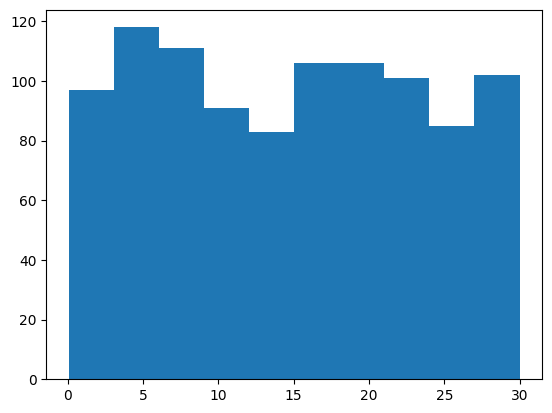

In [206]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

#### **The binomial distribution**

1. Coin flipping (Binary outcomes)

A single flip

binom.rvs(# of coins, probability of heads/success, size=# of trials)

    1 = head
    0 = tails

from scipy.stats import binom
binom.rvs(1, 0.5, size=1)

`array([1])`

2. One flip many times

binom.rvs(1, 0.5, size=8)

Flip `1` coin with `50%` chance of success `8` times

`array([0, 1, 1, 0, 1, 0, 1, 1])`

3. Many flips one time

binom.rvs(8, 0.5, size=1)

Flip `8` coin with `50%` chance of success `1` times

`array([5])`

4. Other probabilities

25% head and 75% tail

binom.rvs(3, 0.25, size=10)

`array([1, 1, 1, 1, 0, 0, 2, 0, 1, 0])`

5. Binomial distribution

*Probability distribution of the number of successes in a sequence of independent trials*

E.g. Number of heads in a sequence of coin flips

Described by *n* and *p*
*n*: total number of trials
*p*: probability of success

binom.rvs(3, 0.5, size=10)   *[p = 0.5, n = 10]*

6. What's the probability of 7 heads?

P (heads = 7)

**binom.pmf(num heads, num trials, prob of heads)**
binom.pmf(7, 10, 0.5)

`0.1171875`

7. What's the probability of 7 or fewer heads?
P (heads ≤ 7)

binom.cdf(7, 10, 0.5)
`0.9453125`

1 - binom.cdf(7, 10, 0.5)
`0.0546875`

8. Expected value

Expected value = *n × p*

Expected number of heads out of 10 flips = 10 × 0.5 = 5

9. Independence

*The binomial distribution is a probability distribution of the number of successes in a sequence of independent trials*
Probabilities of second trial are altered due tooutcome of the first
*If trials are not independent, the binomial distribution does not apply!*


**Simulating sales deals**

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

`numpy` is imported as `np`.

STEP 01

Import binom from scipy.stats and set the random seed to 10.

STEP 02

Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.

In [207]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

[1]


STEP 03

Simulate a typical week of Amir's deals, or one week of 3 deals.

In [208]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))

[1]


STEP 04 
Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals.
Print the mean number of deals he won per week.

In [209]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))

0.8269230769230769


**Calculating binomial probabilities**

Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.

`binom` is imported from `scipy.stats.`

STEP 01 
What's the probability that Amir closes all 3 deals in a week? Save this as prob_3.

STEP 02
What's the probability that Amir closes 1 or fewer deals in a week? Save this as prob_less_than_or_equal_1.

STEP 03
What's the probability that Amir closes more than 1 deal? Save this as prob_greater_than_1.

In [210]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = prob_3 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)


0.027
0.784
0.21599999999999997


**How many sales will be won?**

Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall from the video that the expected value of a binomial distribution can be calculated by
*.n x p*

STEPS
Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.
Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.
Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

In [211]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.30
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


## **More Distributions and the Central Limit Theorem  (Module 03-041)**

#### **The normal distribution**

1. What is the normal distribution?
- Describe as a bell curve
- Symmetrical
- Area = 1
- Curve never hits 0
- Described by mean and standard deviation

2. Standard normal distribution
Mean: 0 
Standard deviation: 1

3. Areas under the normal distribution
- 68% falls within 1 standard deviation
- 95% falls within 2 standard deviations
- 99.7% falls within 3 standard deviations

4. Lots of histograms look normal
Women's heights from NHANES = Normal distribution
Mean: 161 cm
Standard deviation: 7 cm

5. Approximating data with the normal distribution
What percent of women are shorter than 154 cm?

from scipy.stats import norm
norm.cdf(154, 161, 7)

`0.158655`

*16% of women in the survey are shorter than 154 cm*

6. What percent of women are taller than 154 cm?

from scipy.stats import norm
1 - norm.cdf(154, 161, 7)
`0.841345`

7. What percent of women are 154-157 cm?

norm.cdf(157, 161, 7) - norm.cdf(154, 161, 7)
`0.1252`

8. What height are 90% of women shorter than?

norm.ppf(0.9, 161, 7)
`169.97086`

9. What height are 90% of women taller than?

norm.ppf((1-0.9), 161, 7)
`152.029`

10. Generating random numbers

-- Generate 10 random heights
norm.rvs(161, 7, size=10)

`array([155.5758223 , 155.13133235, 160.06377097, 168.33345778, 165.92273375, 163.32677057, 165.13280753, 146.36133538, 149.07845021, 160.5790856 ])`


**Distribution of Amir's sales**

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the `amount` column of `amir_deals` As part of Amir's performance review, you want to be able to estimate the probability of him selling different `amounts`, but before you can do this, you'll need to determine what kind of distribution the amount variable follows.

Both `pandas` as `pd` and `matplotlib.pyplot` as `plt` are loaded and `amir_deals` is available.

STEPS
Create a histogram with 10 bins to visualize the distribution of the amount. Show the plot.

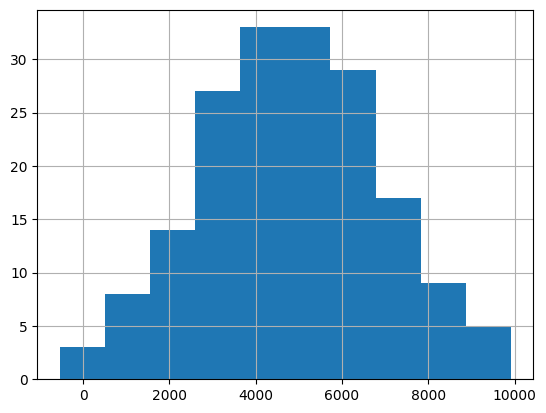

In [212]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()

**Probabilities from the normal distribution**

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the `amount` column of `amir_deals` and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

`norm` from `scipy.stats` is imported as well as pandas as `pd`. The DataFrame `amir_deals` is loaded.

STEP 01
What's the probability of Amir closing a deal worth less than $7500?

STEP 02
What's the probability of Amir closing a deal worth more than $1000?

STEP 03
What's the probability of Amir closing a deal worth between $3000 and $7000?

STEP 04
What amount will 25% of Amir's sales be less than?

In [213]:
from scipy.stats import norm
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)

# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


**Simulating sales under new market conditions**

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the `new_sales` DataFrame, which has already been created for you.

In addition, `norm` from `scipy.stats`, `pandas` as `pd`, and `matplotlib.pyplot` as `plt` are loaded.

STEPS
-Currently, Amir's average sale amount is $5000. Calculate what his new average amount will be if it increases by 20% and store this in new_mean.
-Amir's current standard deviation is $2000. Calculate what his new standard deviation will be if it increases by 30% and store this in new_sd.
-Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and a standard deviation of new_sd.
-Plot the distribution of the new_sales amounts using a histogram and show the plot.

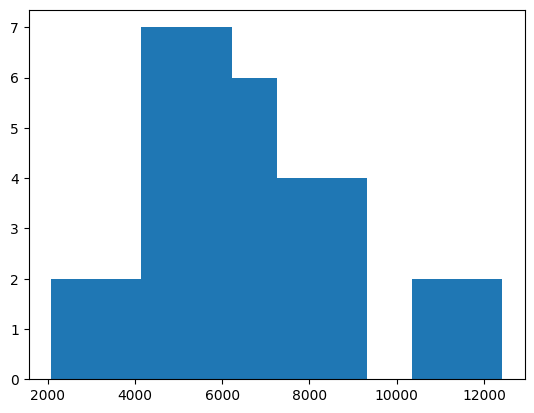

In [214]:
# Calculate new average amount
new_mean = 5000 + (5000*0.2)

# Calculate new standard deviation
new_sd = 2000 + (2000*0.3)

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

#### **The normal distribution**

1. Rolling the dice 5 times

In [215]:
die = pd.Series([1, 2, 3, 4, 5, 6])
# Roll 5 times
samp_5 = die.sample(5, replace=True)
print(samp_5)
np.mean(samp_5)

2    3
5    6
2    3
3    4
0    1
dtype: int64


3.4

2. Rolling the dice 5 times 10 times
Repeat 10 times:
Roll 5 times
Take the mean

[4.8, 4.4, 2.8, 3.6, 3.8, 3.2, 4.0, 2.6, 4.2, 2.6]


<function matplotlib.pyplot.show(close=None, block=None)>

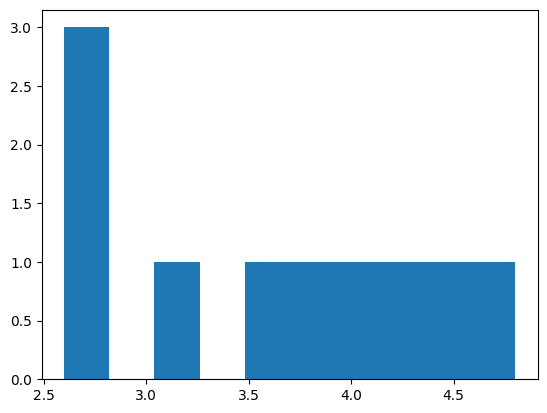

In [216]:
sample_means = []
for i in range(10):
    samp_5 = die.sample(5, replace=True)
    sample_means.append(np.mean(samp_5))
print(sample_means)
plt.hist(sample_means)
plt.show

3. 100 sample means and 1000 sample means

<function matplotlib.pyplot.show(close=None, block=None)>

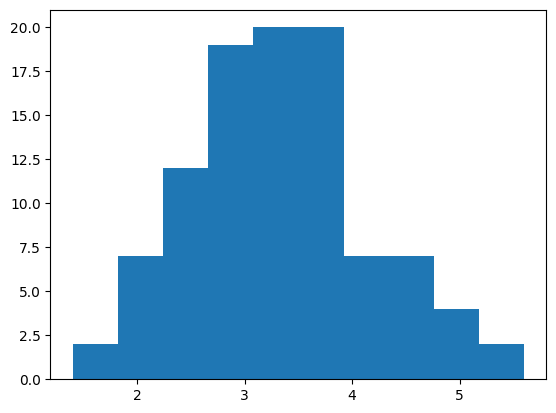

In [217]:
sample_means100 = []
for i in range(100):
    sample_means100.append(np.mean(die.sample(5, replace=True)))
plt.hist(sample_means100)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

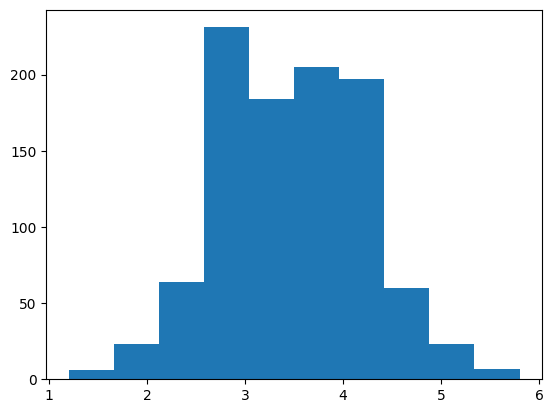

In [218]:
sample_means1000 = []
for i in range(1000):
    sample_means1000.append(np.mean(die.sample(5, replace=True)))
plt.hist(sample_means1000)
plt.show

4. Central limit theorem
*The sampling distribution of a statistic becomes closer to the normal distribution as the number of trials increases.*
Samples should be random and independent

5. Standard deviation and the CLT

<function matplotlib.pyplot.show(close=None, block=None)>

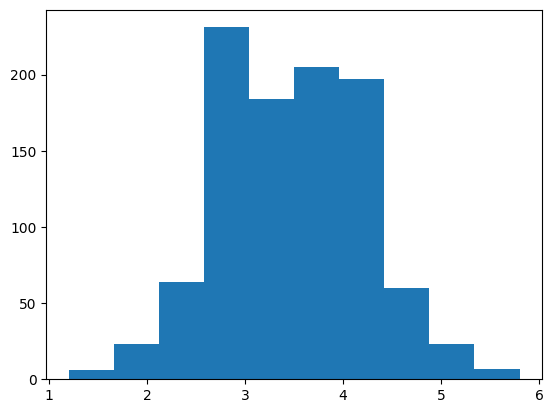

In [219]:
sample_sds = []
for i in range(1000):
    sample_sds.append(np.std(die.sample(5, replace=True)))
plt.hist(sample_means1000)
plt.show

6. Proportions and the CLT

In [220]:
sales_team = pd.Series(["Amir", "Brian", "Claire", "Damian"])
sales_team.sample(10, replace=True)


1     Brian
1     Brian
3    Damian
0      Amir
3    Damian
0      Amir
1     Brian
2    Claire
2    Claire
2    Claire
dtype: object

7. Sampling distribution of proportion

In [221]:
sales_team = pd.Series(["Amir", "Brian", "Claire", "Damian"])
sales_team.sample(10, replace=True)

# Estimate expected value of die
np.mean(sample_means)

3.6

Estimate proportion of "Claire"s
np.mean(sample_props)

`0.26`

-Estimate characteristics of unknown
underlying distribution
-More easily estimate characteristics of
large populations

**The CLT in action**

The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the `num_users` column of `amir_deals` more closely, which contains the number of people who intend to use the product Amir is selling.

pandas as `pd`, `numpy` as `np`, and `matplotlib.pyplot` as `plt` are loaded and `amir_deals` is available.

STEP 01
Create a histogram of the num_users column of amir_deals and show the plot.

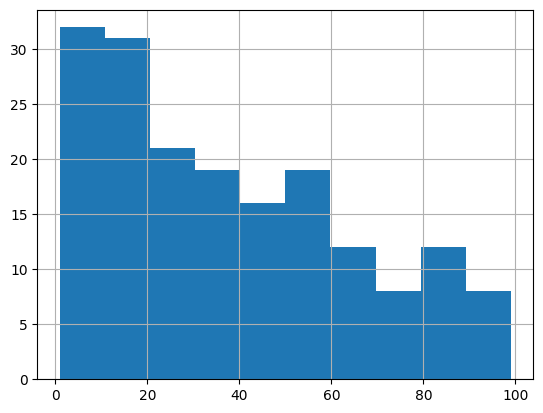

In [222]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist(bins=10)
plt.show()

STEP 02
Set the seed to 104.
Take a sample of size 20 with replacement from the num_users column of amir_deals, and take the mean.

STEP 03
Repeat this 100 times using a for loop and store as sample_means. This will take 100 different samples and calculate the mean of each.

In [223]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace=True)

# Take mean of samp_20
print(np.mean(samp_20))

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
print(sample_means)

32.0
[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1]


STEP 04
Convert sample_means into a pd.Series, create a histogram of the sample_means, and show the plot.

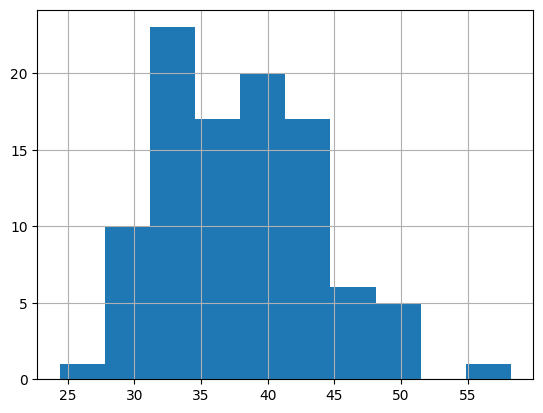

In [241]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

**The mean of means**

You want to know what the average number of users (num_users) is per deal, but you want to know this number for the entire company so that you can see if Amir's deals have more or fewer users than the company's average deal. The problem is that over the past year, the company has worked on more than ten thousand deals, so it's not realistic to compile all the data. Instead, you'll estimate the mean by taking several random samples of deals, since this is much easier than collecting data from everyone in the company.

`amir_deals` is available and the user data for all the company's deals is available in `all_deals`. Both pandas as `pd` and numpy as `np` are loaded.

STPES
-Set the random seed to 321.
-Take 30 samples (with replacement) of size 20 from all_deals['num_users'] and take the mean of each sample. Store the sample means in sample_means.
-Print the mean of sample_means.
-Print the mean of the num_users column of amir_deals.

In [250]:
#print(amir_deals.head(5))
all_deals['num_users'] = amir_deals['num_users']*1.09
print(all_deals.head(5))

0     38
1     86
2    174
3    166
4     34
Name: num_users, dtype: object


In [251]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))

42.31561666666666
37.651685393258425


#### **The Poisson distribution**

1. Poisson processes

Events appear to happen at a certain rate, but completely at random

*Examples*
- Number of animals adopted from an animal shelter per week.
- Number of people arriving at a restaurant per hour
- Number of earthquakes in California per year

Time unit is irrelevant, as long as you use the same unit when talking about the same situation.

2. Poisson distribution

Probability of some # of events occurring over a fixed period of time

*Examples*
- Probability of ≥ 5 animals adopted from an animal shelter per week
- Probability of 12 people arriving at a restaurant per hour
- Probability of < 20 earthquakes in California per year

3. Lambda (λ)

*λ* = average number of events per time interval 
- Average number of adoptions per week = 8
- *Lambda is the distribution's peak*

4. Probability of a single value

If the average number of adoptions per week is 8, what is P (# adoptions in a week = 5)?

from scipy.stats import poisson
poisson.pmf(5, 8)
`0.09160366`

5. Probability of less than or equal to

If the average number of adoptions per week is 8, what is P (# adoptions in a week ≤ 5)?

from scipy.stats import poisson
poisson.cdf(5, 8)
`0.1912361`

6. Probability of greater than

If the average number of adoptions per week is 8, what is P (# adoptions in a week > 5)?

1 - poisson.cdf(5, 8)
`0.8087639`

If the average number of adoptions per week is 10, what is P (# adoptions in a week > 5)?

1 - poisson.cdf(5, 10)
`0.932914`

7. Sampling from a Poisson distribution

from scipy.stats import poisson
poisson.rvs(8, size=10)
`array([ 9, 9, 8, 7, 11, 3, 10, 6, 8, 14])`

8. The CLT still applies! with larger numbers of sample data

**Tracking lead responses**

Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.

STEP 01
Import `poisson` from `scipy.stats` and calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.

STEP 02
Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?

STEP 03
What's the probability that Amir responds to 2 or fewer leads in a day?

STEP 04
What's the probability that Amir responds to more than 10 leads in a day?

In [255]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)

print(prob_5)

# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)

print(prob_coworker)

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)

print(prob_2_or_less)

# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)

print(prob_over_10)

0.1562934518505317
0.17140068409793663
0.23810330555354436
0.0028397661205137315


#### **More probability distributions**

1. Exponential distribution

Probability of time between Poisson events
*Examples*
- Probability of > 1 day between adoptions
- Probability of < 10 minutes between restaurant arrivals
- Probability of 6-8 months between earthquakes
Also uses lambda (rate)
Continuous (time)

2. Customer service requests

On average, one customer service ticket is created every 2 minutes 
λ = 0.5 customer service tickets created each minute
Lambda in exponential distribution

3. Expected value of exponential distributions

In terms of rate (Poisson):
λ = 0.5 requests per minute

In terms of time (exponential):
1/λ = 1 request per 2 minutes

4. How long until a new request is created?

from scipy.stats import expon

P (wait > 3 min) =
1- expon.cdf(3, scale=0.5)
`0.0024787521766663767`

P (wait < 1 min) =
expon.cdf(1, scale=0.5)
`0.8646647167633873`

P (1 min < wait < 3 min) =
expon.cdf(3, scale=0.5) - expon.cdf(1, scale=0.5)
`0.13285653105994633`

5. (Student's) t-distribution
Similar shape as the normal distribution

Degrees of freedom
Has parameter degrees of freedom (df) which a(ects the thickness of the tails
Lower df = thicker tails, higher standard deviation
Higher df = closer to normal distribution

from scipy.stats import t
-- generate random values from t distribution with df=6 and sample size=10
t.rvs(df=6, size=10)
`array([-3.95799716, -0.01099963, -0.55953846, -1.53420055, -1.41775611, -0.45384974, -0.2767931 , -0.40177789, -0.3602592 ,  0.38262431])`

-- calculate p-value
t.cdf(x=-1.5, df=10)
`0.08225366322272008`

6. Log-normal distribution

Variable whose logarithm is normally
distributed

*Examples*
-Length of chess games
-Adult blood pressure
-Number of hospitalizations in the 2003 SARS outbreak

from scipy.stats import lognorm
--make this example reproducible
np.random.seed(1)

--generate log-normal distributed random variable with 1000 values
lognorm_values = lognorm.rvs(s=1, scale=math.exp(1), size=1000)

--view first five values
lognorm_values[:5]

`array([13.79554017,  1.47438888,  1.60292205,  0.92963   ,  6.45856805])`

**Modeling time between leads**

To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, it takes 2.5 hours for him to respond. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

STEP 01
Import *expon* from *scipy.stats*. What's the probability it takes Amir less than an hour to respond to a lead?
STEP 02
What's the probability it takes Amir more than 4 hours to respond to a lead?
STEP 03
What's the probability it takes Amir 3-4 hours to respond to a lead?

In [259]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale=2.5))

# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.3296799539643607
0.20189651799465536
0.09929769391754684


## **Correlation and Experimental Design  (Module 04-041)**

#### **Correlation**

1. 

# END